# Traveling Salesman Lösungen

### Universität der Bundeswehr München - Prof. Dr. Claudius Steinhardt - Logistics Analytics
Erstellt von Sebastian Knall am 30.03.2022

Dieses Notebook stellt verschiedene Lösungsmöglichkeiten für das Traveling Salesman Problem dar und vergleicht ihre Effizients miteinander.

In [1]:
n = int(input ("Anzahl Standorte:"))

Anzahl Standorte:4


In [2]:
#Import aller benötigten Bibliotheken

%pylab --no-import-all inline
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import random
import time
import itertools
import urllib
import csv
import math


Populating the interactive namespace from numpy and matplotlib


# Lösung 1. Alle Routen (allerouten_tsp)
Wir lassen das Programm alle möglichen Routen berechnen und wählen dann den kürzesten Weg.

### Problem formulieren

In [3]:
# Erstelle alle möglichen Routen und wähle die Kürzeste
def allerouten_tsp(standorte):
    return kuerzeste_route(allerouten(standorte))

# Wähle die Route mit der kürzesten Strecke
def kuerzeste_route(routen):
    return min(routen, key=route_laenge)

### Darstellung Routen

In [4]:
# Eine Route ist eine Abfolge von Standorten und demnach eine Permutation der Menge aller Standorte
allerouten = itertools.permutations

In [5]:
# Festlegen der Routenlänge - Summe der Entfernungen zwischen den Standorte
def route_laenge(route):
    return sum(entfernung(route[i], route[i-1])
               for i in range(len(route)))

### Darstellung Standorte
Wir stellen die Koordinaten unserer Standorte zur leichteren Berechnung in die Zahleneben der Komplexen Zahlen. Hierbei entsprich der Wert der X Koordinaten der reelen Komponente, der der Y Koordinaten der imaginären Komponenten. Die Entfernung zwischen zwei Standorten ist die absolute Differenz.

In [6]:
# Standorte sind Punkte und Punkte sind komplexe Zahlen 
Punkt = complex
Standort  = Punkt

# Die X Koordinate ist die reele Komponente
def X(point): 
    return point.real

# Die Y Koordinate ist die imaginäre Komponente
def Y(point): 
    return point.imag

# Die Entfernung zwischen zwei Standorten ist die absolute Differenz
def entfernung(A, B): 
    return abs(A - B)

In [7]:
# Festlegen der zufälligen Erstellung von Standorten - Erstelle eine Menge von n zufällig verteilten Standorten 
def Standorte(n, width=900, height=600, seed=9): # Gleiches n und gleiches Seed = gleiche Verteilung
    random.seed(seed * n)
    return frozenset(Standort(random.randrange(width), random.randrange(height)) #frozenset: Menge ist nicht veränderbar
                     for c in range(n))

### Anwendung Algorithmus

In [8]:
# Festlegen der Anzahl der Standorte und zufällig Erstellung dieser
Standorte(n)

frozenset({(21+291j), (336+59j), (896+80j), 514j})

In [9]:
# Wende allerouten_tsp Funktion an um die kürzeste Route zu finden 

if n < 10: 
    allerouten_tsp(Standorte(n))
else:
    print ("Routen mit mehr als 9 Standorten führen bei dieser Lösungsmethode zu sehr langen Rechenzeiten.")
    print ("Die Berechnung mit dieser Methode wurde deswegen übersprungen.")

In [10]:
def plot_route(route): 
    plot_lines(list(route) + [route[0]])
    
def plot_lines(points, style='bo-'):
    plt.plot(list(map(X, points)), list(map(Y, points)), style)
    plt.axis('scaled'); plt.axis('off')

def plot_standorte(points, *args):
    plot_lines(points, 'bo')
    for (label, p) in enumerate(points):
        style = 'bo-'
    for arg in args:
        if isinstance(arg, str):
            style = arg
        else:
            Xs = [X(points[i]) for i in arg]
            Ys = [Y(points[i]) for i in arg]
            plt.plot(Xs, Ys, style)
    plt.axis('scaled'); plt.axis('off'); plt.show() 
    print(str(n) + " Standorte")

    
def plot_labeled_lines(points, *args):
    plot_lines(points, 'bo')
    for (label, p) in enumerate(points):
        plt.text(X(p), Y(p), '  '+str(label))
    style = 'bo-'
    for arg in args:
        if isinstance(arg, str):
            style = arg
        else:
            Xs = [X(points[i]) for i in arg]
            Ys = [Y(points[i]) for i in arg]
            plt.plot(Xs, Ys, style)
    plt.axis('scaled'); plt.axis('off'); plt.show()    

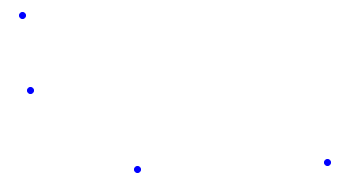

4 Standorte


In [11]:
standorte = list(Standorte(n))
plot_standorte(standorte)

In [12]:
# Darstellung der Länge der kürzesten Route
if n < 10: 
    route_laenge(allerouten_tsp(Standorte(n)))
else:
    print ("Routen mit mehr als 9 Standorten führen bei dieser Lösungsmethode zu sehr langen Rechenzeiten.")
    print ("Die Berechnung mit dieser Methode wurde deswegen übersprungen.")

### Grafische Darstellung

In [13]:
# Wende TSP Algorithmus an und stelle das Ergebnis dar.
    
def plot_tsp(algorithmus, standorte):
    # Berechne die Lösung und die Dauer der Lösung
    t0 = time.time()
    route = algorithmus(standorte)
    t1 = time.time()
    assert richtige_route(route, standorte)
    plot_route(route); plt.show()
    print("{} Standorte mit einer Routenlänge von {:.1f} in {:.3f} Sekunden für {} berechnet"
          .format(len(route), route_laenge(route), t1 - t0, algorithmus.__name__))
    
# Gibt es eine Lösung für das Problem
def richtige_route(route, standorte):
    return set(route) == set(standorte) and len(route) == len(standorte)


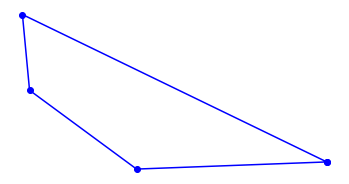

4 Standorte mit einer Routenlänge von 2171.2 in 0.000 Sekunden für allerouten_tsp berechnet
Komplexität der Lösung O(n!):24


In [14]:
if n < 10: 
    plot_tsp(allerouten_tsp, Standorte(n))
    print ("Komplexität der Lösung O(n!):" + str(math.factorial(n)))
else:
    print ("Routen mit mehr als 9 Standorten führen bei dieser Lösungsmethode zu sehr langen Rechenzeiten.")
    print ("Die Berechnung mit dieser Methode wurde deswegen übersprungen.")

# Lösung 2. Alle nicht redundanten Routen (redundant allerouten_tsp)
Wir lassen das Programm alle möglichen Routen berechnen, schließen alle redundanten Routen aus und wählen dann den kürzesten Weg.

In [15]:
# Erstelle Sammlung aller möglichen Routen, dabei beginnt jede am gleichen Standort

def allerouten(standorte):
    start = erster(standorte)
    return [[start] + Route(rest)
            for rest in itertools.permutations(standorte - {start})]

# Iterier über Sammlung und gib erstes Element wieder
def erster(sammlung):
    return next(iter(sammlung))

# Routen sind Listen von Standorten
Route = list

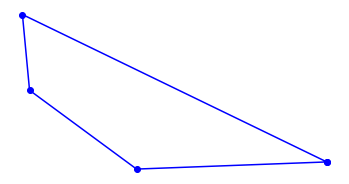

4 Standorte mit einer Routenlänge von 2171.2 in 0.000 Sekunden für allerouten_tsp berechnet
Komplexität der Lösung O(n!):24


In [16]:
if n < 10: 
    plot_tsp(allerouten_tsp, Standorte(n))
    print ("Komplexität der Lösung O(n!):" + str(math.factorial(n)))
else:
    print ("Routen mit mehr als 9 Standorten führen bei dieser Lösungsmethode zu sehr langen Rechenzeiten.")
    print ("Die Berechnung mit dieser Methode wurde deswegen übersprungen.")

#### Warnung! Bei mehr als 10 Standorten kann es je nach Rechnerleistung sehr lange dauern!

# Lösung 3. Nächster Nachbar Algorithmus (nn_tsp)
Wir starten an einem beliebigen Standort und suchen als nächstes Ziel immer den nächsten, noch nicht besuchten Standort.

In [17]:
# Starte die Route am ersten Standort. Nach jedem Standort besuche den nächsten, unbesuchten Standort U
def nn_tsp(standorte):
    start = erster(standorte)
    tour = [start]
    unbesucht = set(standorte - {start})
    while unbesucht:
        U = naechster_nachbar(tour[-1], unbesucht)
        tour.append(U)
        unbesucht.remove(U)
        
    return tour

# Finde den nächsten Nachbar von Standort A
def naechster_nachbar(A, standorte):
    return min(standorte, key=lambda u: entfernung(u, A))

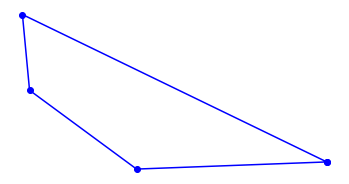

4 Standorte mit einer Routenlänge von 2171.2 in 0.000 Sekunden für nn_tsp berechnet
Komplexität der Lösung O(n^2):16


In [18]:
# Darstellung Lösung
plot_tsp(nn_tsp, Standorte(n))
plt
print ("Komplexität der Lösung O(n^2):" + str(n**2))

# Lösung 4. Wiederholter Nächster Nachbar Algorithmus (wnn_tsp)
Wir starten an einem beliebigen Standort und suchen als nächstes Ziel immer den nächsten, noch nicht besuchten Standort. Dies wiederholen wir für alle Standorte.

In [19]:
# Wiederhole den nn_tsp algorithmus für jeden Standort und gib die kürzeste Route wieder
def wnn_tsp(standorte):
    return kuerzeste_route(nn_tsp(standorte, start) 
                         for start in standorte)

# Starte die Route am ersten Standort. Nach jedem Standort besuche den nächsten, unbesuchten Standort U
def nn_tsp(standorte, start=None):
    if start is None: start = erster(standorte)
    tour = [start]
    unbesucht = set(standorte - {start})
    while unbesucht:
        U = naechster_nachbar(tour[-1], unbesucht)
        tour.append(U)
        unbesucht.remove(U)
    return tour

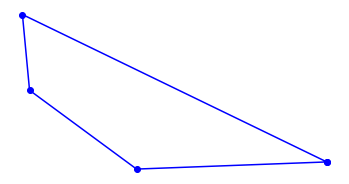

4 Standorte mit einer Routenlänge von 2171.2 in 0.000 Sekunden für wnn_tsp berechnet


In [20]:
# Darstellung Lösung
plot_tsp(wnn_tsp, Standorte(n))

# Lösung 5. Ungekehrter Nächter Nachbar (unn_tsp)
Wir betrachten nun einzelne Routenteile und kehren diese bei Bedarf um.

In [21]:
# Betrachte Route[i:j], wenn Umkehr zu kürzerem Weg führt, kehre um
def umkehr_segment_wenn_besser(route, i, j):
    # Bei Route [...A-B...C-D...], versuche B...C umzukehren um [...A-C...B-D...] zu erhalten
    A, B, C, D = route[i-1], route[i], route[j-1], route[j % len(route)]
    # Sind die ursprünglichen Ecken (AB + CD) länger als die neuen (AC + BD)? Wenn ja, kehre diese um
    if entfernung(A, B) + entfernung(C, D) > entfernung(A, C) + entfernung(B, D):
        route[i:j] = reversed(route[i:j])

# Kehre Segmente der Route um, damit ein kürzerer Weg gefunden wird.
def umkehr_route(route):
    original_laenge = route_laenge(route)
    for (start, ende) in alle_segmente(len(route)):
        umkehr_segment_wenn_besser(route, start, ende)
    # Falls Verbesserung gefunden wurde versuche es erneut
    if route_laenge(route) < original_laenge:
        return umkehr_route(route)
    return route

def alle_segmente(N):
    return [(start, start + laenge)
            for laenge in range(N, 2-1, -1)
            for start in range(N - laenge + 1)]

# Führe nn_tsp durch und kehre wenn nötig Segmente um
def unn_tsp(standorte):
    return umkehr_route(nn_tsp(standorte))

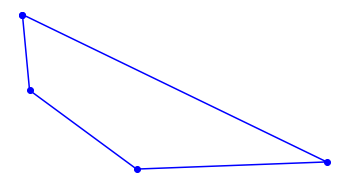

4 Standorte mit einer Routenlänge von 2171.2 in 0.000 Sekunden für unn_tsp berechnet


In [22]:
plot_tsp(unn_tsp, Standorte(n))

# Lösung 6. Kruskal Algorithmus


In [23]:
# Definiere ein Dictionary mit der Form {Stamm:[Ableger]} in dem Stamm und Ableger Knoten sind und plotte selbigen
def plot_graph(graph):
    knoten = {v for stamm in graph for v in graph[stamm]} | set(graph)
    kanten = {(stamm, ableger) for stamm in graph for ableger in graph[stamm]}
    for kante in kanten:
        plot_lines(kante, 'ro-')
    gesamt_laenge = sum(entfernung(p, c) for (p, c) in kanten)
    print('{} Knoten Graph mit einer Gesanmtlänge von: {:.1f}'.format(len(knoten), gesamt_laenge))

In [24]:
# Mit einer vorgegebenen Menge an Knoten erzeuge einen Baum
# Definiere ein Dictionary mit der Form {Stamm:[Ableger]} in dem Stamm und Ableger Knoten sind und der Ursprung der erste Knoten
def ksk(knoten):
    baum  = {erster(knoten): []} # Der erst Standort ist der Ursprung
    kanten = kuerzeste_kante_zuerst(knoten)
    while len(baum) < len(knoten):
        (A, B) = kuerzeste_nutzbare_kante(kanten, baum)
        baum[A].append(B)
        baum[B] = []
    return baum

In [25]:
# Finde die kürzeste Kante in der A schon in Baum ist und B nicht.
def kuerzeste_nutzbare_kante(kanten, baum):
    (A, B) = erster((A, B) for (A, B) in kanten if (A in baum) ^ (B in baum)) # ^ = "xor" 
    return (A, B) if (A in baum) else (B, A)

In [26]:
# Finde alle Kanten zwischen zwei Standorten und sortiere sie der Länge nach
def kuerzeste_kante_zuerst(standorte):
    kanten = [(A, B) for A in standorte for B in standorte 
                    if id(A) < id(B)]
    return sorted(kanten, key=lambda kante: entfernung(*kante))

4 Knoten Graph mit einer Gesanmtlänge von: 1175.6


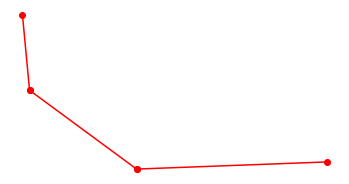

In [27]:
plot_graph(ksk(Standorte(n)))

In [28]:
# Erzeuge einen Baum und gehe in in aufsteigender Reihenfolge ab, ignoriere dopptelte Wege
def ksk_tsp(standorte):
    return aufsteigen(baum=ksk(standorte), start=erster(standorte))

def aufsteigen(baum, start):
    ergebnis = [start]
    for ableger in baum.get(start, ()):
        ergebnis.extend(aufsteigen(baum, ableger))
    return ergebnis

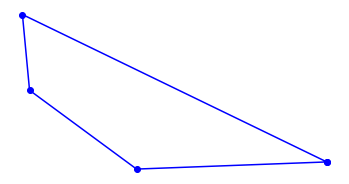

4 Standorte mit einer Routenlänge von 2171.2 in 0.000 Sekunden für ksk_tsp berechnet
Komplexität der Lösung O(n^2):16


In [29]:
plot_tsp(ksk_tsp, Standorte(n))
print ("Komplexität der Lösung O(n^2):" + str(n**2))

In [30]:
# Kehre Route um
def umkehr_ksk_tsp(standorte): return umkehr_route(ksk_tsp(standorte))

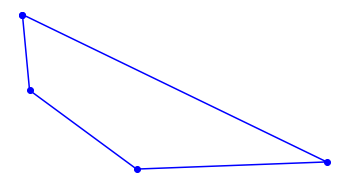

4 Standorte mit einer Routenlänge von 2171.2 in 0.000 Sekunden für umkehr_ksk_tsp berechnet


In [31]:
plot_tsp(umkehr_ksk_tsp, Standorte(n))

# Lösung 7. Cheapest Insertion Algorithmus
Finden die kürzesten Strecken zwischen zwei Standorte und binde sie in die Tour ein

In [32]:
def ci_tsp(standorte):
    kante = kuerzeste_kante_zuerst(standorte)
    endpunkte = {s: [s] for s in standorte}
    for (A, B) in kante:
        if A in endpunkte and B in endpunkte and endpunkte[A] != endpunkte[B]:
            neues_segment = verbinde_endpunkte(endpunkte, A, B)
            if len(neues_segment) == len(standorte):
                return neues_segment

In [33]:
def verbinde_endpunkte(endpunkte, A, B):
    Asegment, Bsegment = endpunkte[A], endpunkte[B]
    if Asegment[-1] is not A: Asegment.reverse()
    if Bsegment[0] is not B: Bsegment.reverse()
    Asegment.extend(Bsegment)
    del endpunkte[A], endpunkte[B]
    endpunkte[Asegment[0]] = endpunkte[Asegment[-1]] = Asegment
    return Asegment

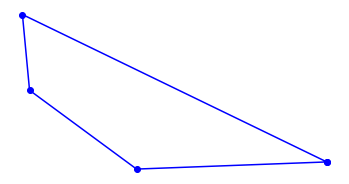

4 Standorte mit einer Routenlänge von 2171.2 in 0.000 Sekunden für ci_tsp berechnet
Komplexität der Lösung O(n^2 x log2(n))):32.0


In [34]:
plot_tsp(ci_tsp, Standorte(n))
print ("Komplexität der Lösung O(n^2 x log2(n))):" + str((n**2) * math.log2(n)))

# Lösung 8. Held-Karp Algorithmus
Betrachte Alle Touren Algorithmus. Ignoriere sämtlichen Routen die von Beginn an zu lang sind um Teil der optimalen Lösung zu sein.

In [35]:
# Für jeden Endstandort C finde die kürzesten Segmente vom Startpunkt A zu C. 
#Von all diesen Segmente wähle jene, welche die kürzeste Tour ergeben
def hk_tsp(standorte):
    A = erster(standorte)
    segmente = [kuerzestes_segment(A, standorte - {A, C}, C)
                for C in standorte if C is not A]
    return kuerzeste_route(segmente)

In [36]:
# Das kürzeste bei A beginnende Segment, welchges durch alle Bs geht und bei C endet.
def kuerzestes_segment(A, Bs, C):
    if not Bs:
        return [A, C]
    else:
        segmente = [kuerzestes_segment(A, Bs - {B}, B) + [C] 
                    for B in Bs]
        return min(segmente, key=segment_laenge)
            
def segment_laenge(segment):
    return sum(entfernung(segment[i], segment[i-1]) 
               for i in range(1, len(segment)))

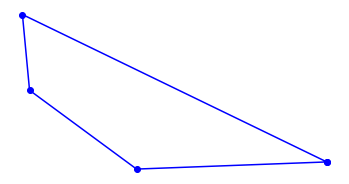

4 Standorte mit einer Routenlänge von 2171.2 in 0.000 Sekunden für hk_tsp berechnet
Komplexität der Lösung O(n^2 x 2^n)):256


In [37]:
if n < 10: 
    plot_tsp(hk_tsp, Standorte(n))
    print ("Komplexität der Lösung O(n^2 x 2^n)):" + str((n**2) * (2**n)))

# Zwischenergebnis: Verlgeich der Algorithmen
Wir vergleiche die bekannten Lösungsverfahren in Geschhwindigkeit und Genauigkeit

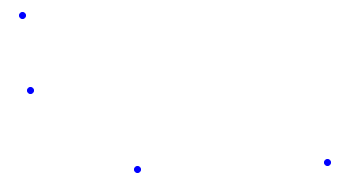

4 Standorte




Nächster Nachbar


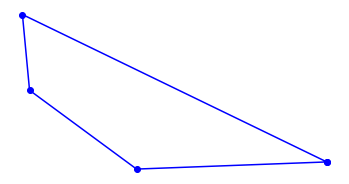

4 Standorte mit einer Routenlänge von 2171.2 in 0.000 Sekunden für nn_tsp berechnet
Komplexität der Lösung O(n^2):16


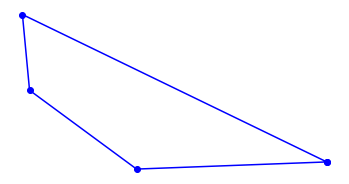

4 Standorte mit einer Routenlänge von 2171.2 in 0.000 Sekunden für wnn_tsp berechnet


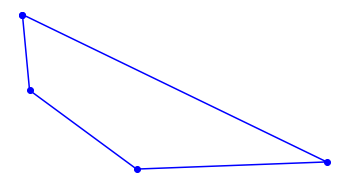

4 Standorte mit einer Routenlänge von 2171.2 in 0.000 Sekunden für unn_tsp berechnet




Cheapest Insertion


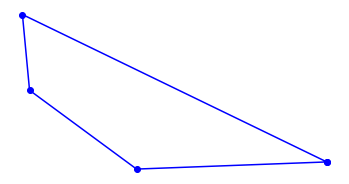

4 Standorte mit einer Routenlänge von 2171.2 in 0.000 Sekunden für ci_tsp berechnet
Komplexität der Lösung O(n^2 x log2(n))):32.0




Kruskal


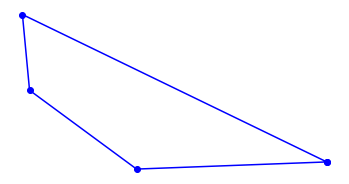

4 Standorte mit einer Routenlänge von 2171.2 in 0.000 Sekunden für ksk_tsp berechnet
Komplexität der Lösung O(n^2):16


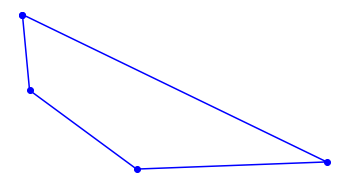

4 Standorte mit einer Routenlänge von 2171.2 in 0.000 Sekunden für umkehr_ksk_tsp berechnet




Held-Karp


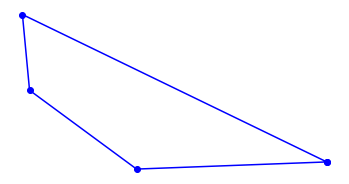

4 Standorte mit einer Routenlänge von 2171.2 in 0.000 Sekunden für hk_tsp berechnet
Komplexität der Lösung O(n^2 x 2^n)):256




Brute Force


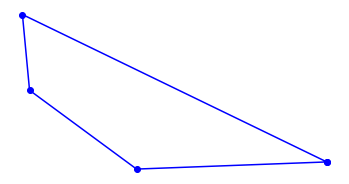

4 Standorte mit einer Routenlänge von 2171.2 in 0.000 Sekunden für allerouten_tsp berechnet
Komplexität der Lösung O(n!):24


In [38]:
plot_standorte(standorte)
print('\n')
print('\n')
print("Nächster Nachbar")
plot_tsp(nn_tsp, Standorte(n))
print ("Komplexität der Lösung O(n^2):" + str(n**2))
plot_tsp(wnn_tsp, Standorte(n))
plot_tsp(unn_tsp, Standorte(n))
print('\n')
print('\n')
print("Cheapest Insertion")
plot_tsp(ci_tsp, Standorte(n))
print ("Komplexität der Lösung O(n^2 x log2(n))):" + str((n**2) * math.log2(n)))
print('\n')
print('\n')
print("Kruskal")
plot_tsp(ksk_tsp, Standorte(n))
print ("Komplexität der Lösung O(n^2):" + str(n**2))
plot_tsp(umkehr_ksk_tsp, Standorte(n))
print('\n')
print('\n')
print("Held-Karp")
if n < 10: 
    plot_tsp(hk_tsp, Standorte(n))
    print ("Komplexität der Lösung O(n^2 x 2^n)):" + str((n**2) * (2**n)))
else:
    print ("Routen mit mehr als 9 Standorten führen bei dieser Lösungsmethode zu sehr langen Rechenzeiten.")
    print ("Die Berechnung mit dieser Methode wurde deswegen übersprungen.")
print('\n')
print('\n')
print ("Brute Force")
if n < 10: 
    plot_tsp(allerouten_tsp, Standorte(n))
    print ("Komplexität der Lösung O(n!):" + str(math.factorial(n)))
else:
    print ("Routen mit mehr als 9 Standorten führen bei dieser Lösungsmethode zu sehr langen Rechenzeiten.")
    print ("Die Berechnung mit dieser Methode wurde deswegen übersprungen.")
